In [3]:
import pandas as pd
import re
import itertools
import seaborn as sns
%matplotlib inline

In [4]:
RES = [('NZ', """Ok           |      253076   35.74 %    |      253003   35.73 %
Compatible   |      347659   49.10 %    |      347659   49.10 %
High latency |       14550    2.06 %    |        6022    0.85 %
Dead         |       92722   13.10 %    |      101323   14.31 %"""),
       ('CL', """Ok           |      286016   66.92 %    |      286016   66.92 %
Compatible   |       73595   17.22 %    |       73594   17.22 %
High latency |       14309    3.35 %    |       10149    2.37 %
Dead         |       53495   12.52 %    |       57656   13.49 %"""),
       ('CZ', """Ok           |      917898   71.07 %    |      917892   71.07 %
Compatible   |      171619   13.29 %    |      171614   13.29 %
High latency |      101727    7.88 %    |       96388    7.46 %
Dead         |      100287    7.76 %    |      105637    8.18 %"""),
      ('NU', """Ok           |      145424   33.21 %    |      145424   33.21 %
Compatible   |      257108   58.72 %    |      257095   58.72 %
High latency |       14149    3.23 %    |        2480    0.57 %
Dead         |       21151    4.83 %    |       32833    7.50 %"""),
      ('SE', """Ok           |      796835   46.85 %    |      796834   46.85 %
Compatible   |      816211   47.98 %    |      816191   47.98 %
High latency |       15651    0.92 %    |       10943    0.64 %
Dead         |       72284    4.25 %    |       77013    4.53 %""")]

In [5]:
res_pat = re.compile('^(\w+|\w+\s\w+)\s+\|\s+(\d+)\s+(\d+\.\d+)\s+\%\s+\|\s+(\d+)\s+(\d+\.\d+)\s\%')

In [6]:
def matchres(r):
    m = res_pat.match(r)
    if m is None:
        return None
    else:
        return [{'Category': m.group(1),
               'count': int(m.group(2)),
               'perc': float(m.group(3)),
                 'mode': 'Permissive'},
                {'Category': m.group(1),
               'count': int(m.group(4)),
               'perc': float(m.group(5)),
                 'mode': 'Strict'}]

In [7]:
def parse_cc_res(e):
    d = pd.DataFrame([e for e in itertools.chain.from_iterable([matchres(r) for r in e[1].split("\n")])])
    d['CC'] = e[0]
    return d

In [8]:
d = pd.concat([parse_cc_res(e) for e in RES])

In [9]:
d

,Category,count,mode,perc,CC
0,Ok,253076,Permissive,35.74,NZ
1,Ok,253003,Strict,35.73,NZ
2,Compatible,347659,Permissive,49.10,NZ
3,Compatible,347659,Strict,49.10,NZ
4,High latency,14550,Permissive,2.06,NZ
5,High latency,6022,Strict,0.85,NZ
6,Dead,92722,Permissive,13.10,NZ
7,Dead,101323,Strict,14.31,NZ
0,Ok,286016,Permissive,66.92,CL
1,Ok,286016,Strict,66.92,CL


In [10]:
# d.to_csv('CL-CZ-NZ.combined.csv')

In [18]:
ok_comp = d[d.Category.isin(['Ok', 'Compatible'])].groupby(['CC', 'Category']).agg(max).reset_index()

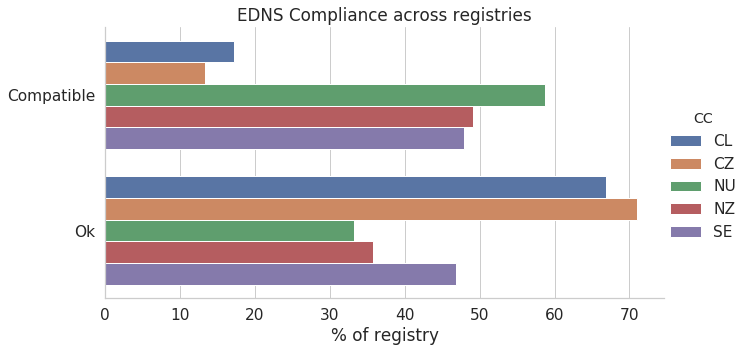

In [32]:
ax = sns.catplot(data=ok_comp, y='Category', x='perc', hue='CC', kind='bar', aspect=2)
ax.set_axis_labels('% of registry', '')
ax.set(title='EDNS Compliance across registries')

In [27]:
not_ok = d[d.Category.isin(['High latency', 'Dead'])]

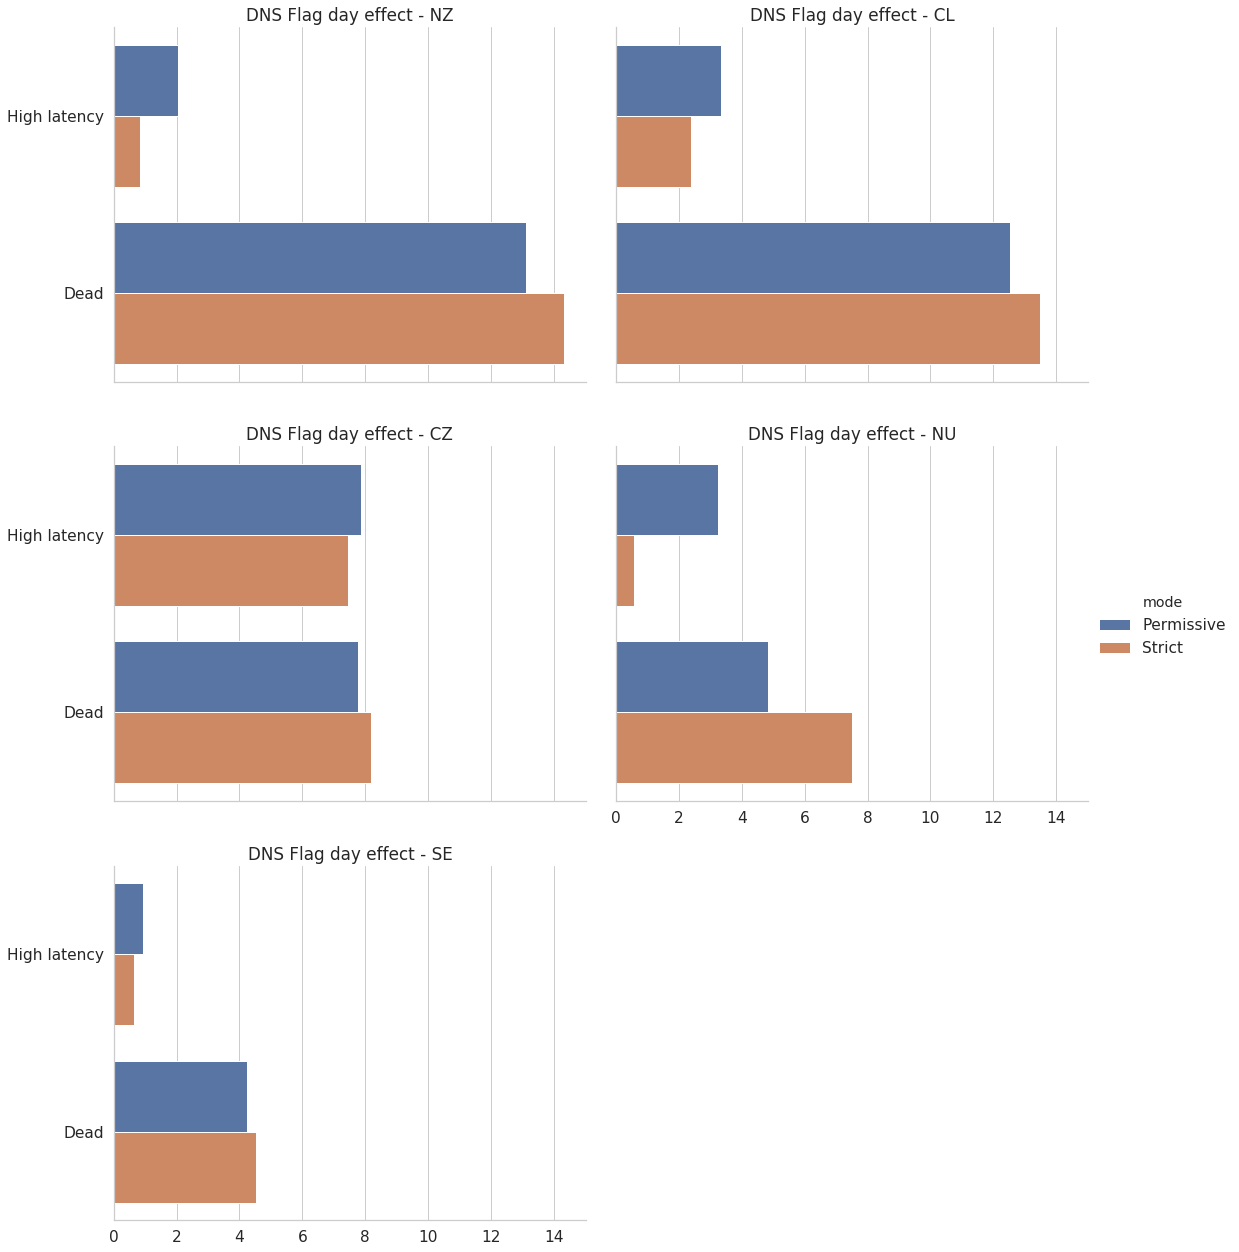

In [36]:
sns.set(style='whitegrid', font_scale=1.4)
g = sns.catplot(data=not_ok, x='perc', y='Category', hue='mode', kind='bar', col='CC', height=6, aspect=4/3, col_wrap=2)
g.set_axis_labels('', '')
g.set_titles(col_template='DNS Flag day effect - {col_name}')
# g.savefig('CL-CZ-NZ.combined.png')